In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("SSMA.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

In [3]:
df.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [4]:
df.describe()

,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,353.000000,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,203.660256,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,1.000000,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,177.000000,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,353.000000,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,529.000000,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,705.000000,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


In [5]:
df.isna().sum()

Student_ID                      0
Age                             0
Gender                          0
Academic_Level                  0
Country                         0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_Score                  0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.columns

Index(['Student_ID', 'Age', 'Gender', 'Academic_Level', 'Country',
       'Avg_Daily_Usage_Hours', 'Most_Used_Platform',
       'Affects_Academic_Performance', 'Sleep_Hours_Per_Night',
       'Mental_Health_Score', 'Relationship_Status',
       'Conflicts_Over_Social_Media', 'Addicted_Score'],
      dtype='object')

In [8]:
df = df.drop(['Student_ID', 'Country', 'Most_Used_Platform'], axis=1)

In [9]:
df['Age'].value_counts()

Age
20    165
19    163
21    156
22    147
23     34
24     26
18     14
Name: count, dtype: int64

<Axes: >

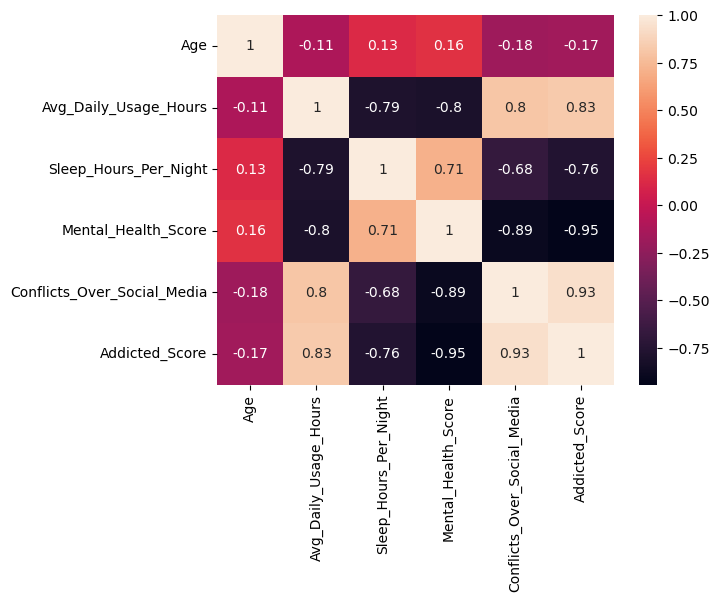

In [10]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

<Figure size 600x600 with 0 Axes>

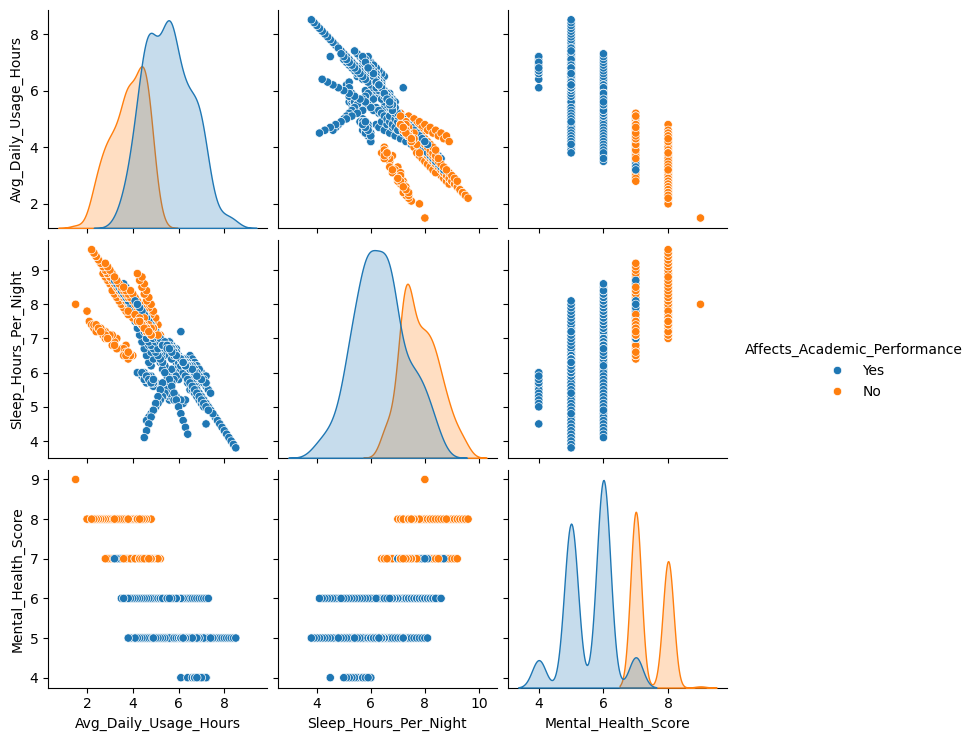

In [11]:
plt.figure(figsize=(6,6))
sns.pairplot(df, vars=['Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score'], hue='Affects_Academic_Performance')

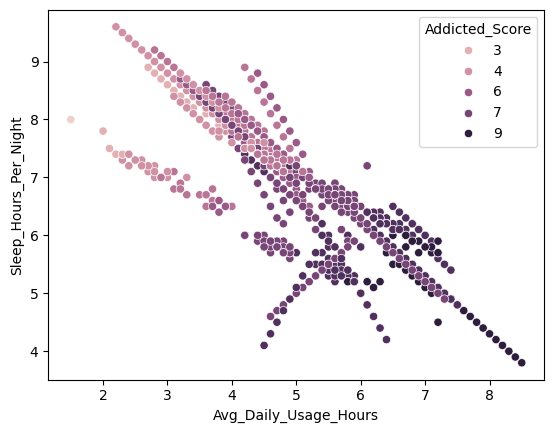

In [12]:
sns.scatterplot(x='Avg_Daily_Usage_Hours', y='Sleep_Hours_Per_Night', data=df ,hue='Addicted_Score')
plt.show()

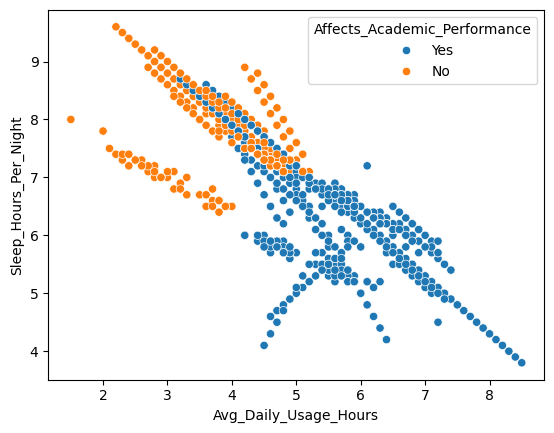

In [13]:
sns.scatterplot(x='Avg_Daily_Usage_Hours', y='Sleep_Hours_Per_Night', data=df ,hue='Affects_Academic_Performance')
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

df['Affects_Academic_Performance'] = df['Affects_Academic_Performance'].map({'Yes':1, 'No':0})


In [15]:
y = df['Affects_Academic_Performance']
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Affects_Academic_Performance, dtype: int64

In [16]:
x = df.drop(columns=['Affects_Academic_Performance'])
x

,Age,Gender,Academic_Level,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,19,Female,Undergraduate,5.2,6.5,6,In Relationship,3,8
1,22,Male,Graduate,2.1,7.5,8,Single,0,3
2,20,Female,Undergraduate,6.0,5.0,5,Complicated,4,9
3,18,Male,High School,3.0,7.0,7,Single,1,4
4,21,Male,Graduate,4.5,6.0,6,In Relationship,2,7
...,...,...,...,...,...,...,...,...,...
700,20,Female,Undergraduate,4.7,7.2,7,In Relationship,2,5
701,23,Male,Graduate,6.8,5.9,4,Single,5,9
702,21,Female,Undergraduate,5.6,6.7,6,In Relationship,3,7
703,24,Male,Graduate,4.3,7.5,8,Single,2,4


In [17]:
encoder = LabelEncoder()

In [18]:
x['Gender'] = encoder.fit_transform(x['Gender'])
x['Academic_Level'] = encoder.fit_transform(x['Academic_Level'])
x['Relationship_Status'] = encoder.fit_transform(x['Relationship_Status'])
x

,Age,Gender,Academic_Level,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,19,0,2,5.2,6.5,6,1,3,8
1,22,1,0,2.1,7.5,8,2,0,3
2,20,0,2,6.0,5.0,5,0,4,9
3,18,1,1,3.0,7.0,7,2,1,4
4,21,1,0,4.5,6.0,6,1,2,7
...,...,...,...,...,...,...,...,...,...
700,20,0,2,4.7,7.2,7,1,2,5
701,23,1,0,6.8,5.9,4,2,5,9
702,21,0,2,5.6,6.7,6,1,3,7
703,24,1,0,4.3,7.5,8,2,2,4


In [19]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, shuffle=True)

lr = LogisticRegression(random_state=1)
lr.fit(x_train, y_train)


LogisticRegression(random_state=1)

In [20]:
lr_pred = lr.predict(x_test)
print(accuracy_score(y_test, lr_pred)*100)


100.0


In [21]:
for i in range(len(lr_pred)):
    print(y_test.iloc[i], lr_pred[i])

1 1
1 1
1 1
1 1
0 0
1 1
0 0
0 0
0 0
1 1
1 1
0 0
0 0
0 0
1 1
1 1
0 0
0 0
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0
0 0
0 0
0 0
1 1
1 1
1 1
1 1
1 1
0 0
0 0
1 1
1 1
0 0
0 0
0 0
1 1
1 1
0 0
1 1
1 1
1 1
0 0
1 1
1 1
0 0
0 0
1 1
0 0
1 1
1 1
1 1
1 1
1 1
1 1
0 0
1 1
1 1
1 1
1 1
0 0
1 1
1 1
0 0
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0
1 1
1 1
1 1
1 1
0 0
0 0
1 1
0 0
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0
0 0
1 1
1 1
1 1
0 0
0 0
1 1
1 1
0 0
1 1
0 0
0 0
1 1
1 1
0 0
0 0
1 1
1 1
1 1
0 0
1 1
1 1
1 1
0 0
0 0
0 0
1 1
0 0
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0
1 1
1 1
1 1
0 0
0 0


In [22]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, lr_pred)
cm

array([[47,  0],
       [ 0, 94]], dtype=int64)

In [23]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       1.00      1.00      1.00        94

    accuracy                           1.00       141
   macro avg       1.00      1.00      1.00       141
weighted avg       1.00      1.00      1.00       141

